# Preprocessing and Modeling

### Contents:

 - [DataFrame to Input Results From Models](#DataFrame-to-Input-Results-From-Models)
 - [Import Data](#Import-Data)
 - [Baseline Model](#Baseline-Model])
 - [Model 1: Adding Epochs and Changing Density](#Model-1:-Adding-Epochs-and-Changing-Density)
 - [Model 2: Adding Layers](#Model-2:-Adding-Layers)
 - [Model 3: Changing Layers and Using Early Stopping](#Model-3:-Changing-Layers-and-Using-Early-Stopping)
 - [Model 4: Changing Layers and Dropout](#Model-4:-Changing-Layers-and-Dropout)
 - [Model 5: Kernal Regularizer with Dropout](#Model-5:-Kernal-Regularizer-with-Dropout)
 - [Model 6: Adding Convolutional Operation](#Model-6:-Adding-Convolutional-Operation)
 - [Model 7: Convolutional Operation and Max Pooling](#Model-7:-Convolutional-Operation-and-Max-Pooling)
 - [Model 8: Adding Prebuilt Networks InceptionV3](#Model-8:-Adding-Prebuilt-Networks-InceptionV3)
 - [Model 9: Adding Prebuilt Networks Xception](#Model-9:-Adding-Prebuilt-Networks-Xception)
 - [Model 10: Adding Prebuilt Networks VGG16](#Model-10:-Adding-Prebuilt-Networks-VGG16)
 - [Model 11: Adding Prebuilt Networks MobileNetV2](Model-11:-Adding-Prebuilt-Networks-MobileNetV2)
 - [Best Model:Model 12: Experimenting with Convolutional Layers and Pooling (Adding Augmented Images)](#Best-Model:Model-12:-Experimenting-with-Convolutional-Layers-and-Pooling-(Adding-Augmented-Images))
 - [Model 13: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Average Pool)](#Model-13:-Experimenting-with-Convolutional-Layers,-Augmented-Data-and-Pooling-(Adding-Average-Pool))
 - [Model 14: Experimenting with Convolutional Layers, Augmented Images, and Pooling (Adding Global Average Pool)](#Model-14:-Experimenting-with-Convolutional-Layers,-Augmented-Images,-and-Pooling-(Adding-Global-Average-Pool))
 - [Model 15: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Global Max Pool)](#Model-15:-Experimenting-with-Convolutional-Layers,-Augmented-Data-and-Pooling-(Adding-Global-Max-Pool))
 - [Model 16: Maxpool,Conv2D, with Less Neurons](#Model-16:-Maxpool,Conv2D,-with-Less-Neurons)
 - [Model 17: Freezing Inception-ResNetV2](#Model-17:-Freezing-Inception-ResNetV2)
 - [Exports](#Exports)

Ear Images Reference:https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0232776

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception, InceptionResNetV2, ResNet101
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

### DateFrame to Input Results From Models

In [4]:
results_df2 = pd.read_csv('../data/results_df2.csv', index_col = [0])

In [13]:
results_df2.head()

,Model,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
0,baseline,0.8846,0.5526,0.5526,0.9013,0.5467,0.5467,0.8782,0.5395,0.5395
1,model_1,1.0000,0.6053,0.6053,1.0000,0.6053,0.6053,1.0000,0.6053,0.6053
2,model_2,0.9936,0.5658,0.5658,1.0000,0.5616,0.5616,0.9904,0.5395,0.5395
3,model_3,0.5801,0.4737,0.4737,0.5820,0.4800,0.4800,0.5801,0.4737,0.4737
4,model_4,0.6603,0.5658,0.5658,0.7706,0.6129,0.6129,0.5385,0.5000,0.5000


In [4]:
results_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            21 non-null     object 
 1   train_accuracy   17 non-null     float64
 2   val_accuracy     17 non-null     float64
 3   test_accuracy    17 non-null     float64
 4   train_precision  17 non-null     float64
 5   val_precision    17 non-null     float64
 6   test_precision   17 non-null     float64
 7   train_recall     17 non-null     float64
 8   val_recall       17 non-null     float64
 9   test_recall      17 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.8+ KB


In [5]:
results_df2['train_accuracy'] = pd.to_numeric(results_df2['train_accuracy'])
results_df2['val_accuracy'] = pd.to_numeric(results_df2['val_accuracy'])
results_df2['test_accuracy'] = pd.to_numeric(results_df2['test_accuracy'])
results_df2['train_precision'] = pd.to_numeric(results_df2['train_precision'])
results_df2['val_precision'] = pd.to_numeric(results_df2['val_precision'])
results_df2['test_precision'] = pd.to_numeric(results_df2['test_precision'])
results_df2['train_recall'] = pd.to_numeric(results_df2['train_recall'])
results_df2['val_recall'] = pd.to_numeric(results_df2['val_recall'])
results_df2['test_recall'] = pd.to_numeric(results_df2['test_recall'])

In [6]:
results_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            21 non-null     object 
 1   train_accuracy   17 non-null     float64
 2   val_accuracy     17 non-null     float64
 3   test_accuracy    17 non-null     float64
 4   train_precision  17 non-null     float64
 5   val_precision    17 non-null     float64
 6   test_precision   17 non-null     float64
 7   train_recall     17 non-null     float64
 8   val_recall       17 non-null     float64
 9   test_recall      17 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.8+ KB


## Import Data 

In [14]:
train_gen = ImageDataGenerator(rescale = 1/255.)

train_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/train/')

Found 312 images belonging to 4 classes.


In [15]:
test_gen = ImageDataGenerator(rescale = 1/255.)

test_data = test_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/test/', shuffle = False)

Found 76 images belonging to 4 classes.


## Baseline Model

In [9]:
model = Sequential()
model.add(Flatten())
model.add(Dense(150, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [10]:
history = model.fit(train_data, epochs = 30, validation_data = test_data,
    batch_size = 32)

Epoch 1/30
10/10 [==============================] - 6s 524ms/step - loss: 90.0312 - accuracy: 0.3141 - recall: 0.2853 - precision: 0.3080 - val_loss: 55.1820 - val_accuracy: 0.4474 - val_recall: 0.4474 - val_precision: 0.4474
Epoch 2/30
10/10 [==============================] - 5s 550ms/step - loss: 28.8455 - accuracy: 0.3814 - recall: 0.3814 - precision: 0.3814 - val_loss: 20.2920 - val_accuracy: 0.2632 - val_recall: 0.2632 - val_precision: 0.2632
Epoch 3/30
10/10 [==============================] - 5s 561ms/step - loss: 12.7091 - accuracy: 0.4936 - recall: 0.4936 - precision: 0.4936 - val_loss: 8.5104 - val_accuracy: 0.4737 - val_recall: 0.4737 - val_precision: 0.4737
Epoch 4/30
10/10 [==============================] - 5s 537ms/step - loss: 7.7495 - accuracy: 0.5833 - recall: 0.5833 - precision: 0.5833 - val_loss: 8.2116 - val_accuracy: 0.4474 - val_recall: 0.4474 - val_precision: 0.4474
Epoch 5/30
10/10 [==============================] - 5s 507ms/step - loss: 5.5463 - accuracy: 0.5577

#### Adding Results to DF

In [16]:
results_df2['train_accuracy'].iloc[0] = 0.8846

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
results_df2['val_accuracy'].iloc[0] = 0.5526

In [18]:
results_df2['train_precision'].iloc[0] =0.9013

In [19]:
results_df2['val_precision'].iloc[0] =  0.5467

In [20]:
results_df2['train_recall'].iloc[0] = 0.8782

In [21]:
results_df2['val_recall'].iloc[0] = 0.5395 

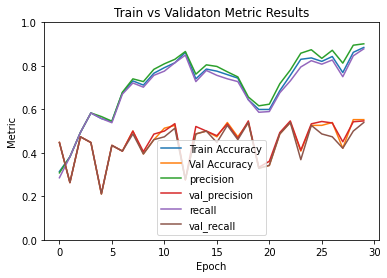

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validaton Metric Results');

Model is overfit model

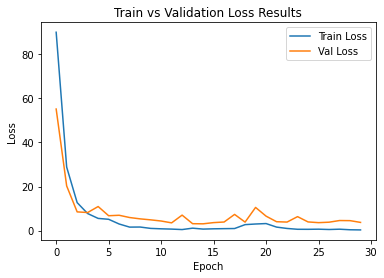

In [18]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [19]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [439]:
model.evaluate(test_data)

preds = model.predict(test_data)
preds = np.argmax(preds, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds)


3/3 [==============================] - 1s 231ms/step - loss: 3.7345 - accuracy: 0.5526 - recall: 0.5395 - precision: 0.5467


#### Adding Results to DF

In [22]:
results_df2['test_recall'].iloc[0] = 0.5395

In [23]:
results_df2['test_accuracy'].iloc[0] = 0.5526

In [24]:
results_df2['test_precision'].iloc[0] = 0.5467

#### Confusion Matrix

In [440]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       5             1     1
normal               0      23             1    10
otitis_media         0       5             5     6
tube                 0       4             1    14


#### Classification Report 

In [441]:
print(classification_report(test_data_values, preds, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.62      0.68      0.65        34
otitis_media       0.62      0.31      0.42        16
        tube       0.45      0.74      0.56        19

    accuracy                           0.55        76
   macro avg       0.42      0.43      0.41        76
weighted avg       0.52      0.55      0.52        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 1: Adding Epochs and Changing Density 

In [26]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(4, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [27]:
history1 = model1.fit(train_data, epochs = 100, validation_data = test_data,
    batch_size = 32)

Epoch 1/100
10/10 [==============================] - 5s 487ms/step - loss: 80.1258 - accuracy: 0.3558 - recall: 0.3205 - precision: 0.3521 - val_loss: 33.0448 - val_accuracy: 0.0921 - val_recall: 0.0921 - val_precision: 0.0921
Epoch 2/100
10/10 [==============================] - 5s 489ms/step - loss: 14.6660 - accuracy: 0.3622 - recall: 0.3622 - precision: 0.3657 - val_loss: 14.9027 - val_accuracy: 0.3158 - val_recall: 0.3158 - val_precision: 0.3158
Epoch 3/100
10/10 [==============================] - 5s 484ms/step - loss: 10.2364 - accuracy: 0.4744 - recall: 0.4744 - precision: 0.4759 - val_loss: 5.1838 - val_accuracy: 0.4605 - val_recall: 0.4605 - val_precision: 0.4605
Epoch 4/100
10/10 [==============================] - 4s 453ms/step - loss: 3.0356 - accuracy: 0.5769 - recall: 0.5705 - precision: 0.5779 - val_loss: 5.8536 - val_accuracy: 0.3816 - val_recall: 0.3816 - val_precision: 0.3816
Epoch 5/100
10/10 [==============================] - 5s 454ms/step - loss: 1.9369 - accuracy: 0

#### Adding Results to DF

In [238]:
results_df2['train_accuracy'].iloc[1] = 1.0000

In [239]:
results_df2['val_accuracy'].iloc[1] =  0.6053

In [240]:
results_df2['train_recall'].iloc[1] = 1.0000

In [241]:
results_df2['val_recall'].iloc[1] = 0.6053

In [242]:
results_df2['train_precision'].iloc[1] = 1.0000

In [243]:
results_df2['val_precision'].iloc[1] = 0.6053

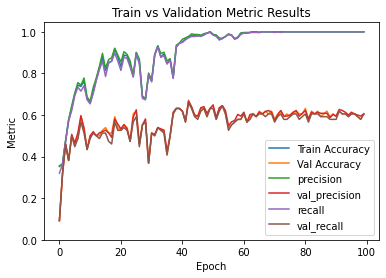

In [34]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history1.history['precision'], label = 'precision')
plt.plot(history1.history['val_precision'], label = 'val_precision')
plt.plot(history1.history['recall'], label = 'recall')
plt.plot(history1.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

model still over fit 

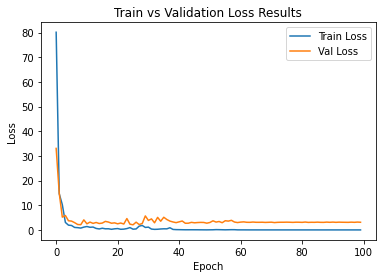

In [35]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [36]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [436]:
model1.evaluate(test_data)

preds1 = model1.predict(test_data)
preds1 = np.argmax(preds1, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds1)

3/3 [==============================] - 1s 224ms/step - loss: 3.1118 - accuracy: 0.6053 - recall: 0.6053 - precision: 0.6053


#### Adding Test Data to DF

In [246]:
results_df2['test_accuracy'].iloc[1] = 0.6053

In [245]:
results_df2['test_recall'].iloc[1] =0.6053

In [244]:
results_df2['test_precision'].iloc[1] = 0.6053 

#### Confusion Matrix

In [437]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             2       5             0     0
normal               0      20             5     9
otitis_media         0       2             7     7
tube                 0       1             1    17


this model did well at classifying normal and tube pictures 

#### Classifcation Report 

In [438]:
print(classification_report(test_data_values, preds1, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       1.00      0.29      0.44         7
      normal       0.71      0.59      0.65        34
otitis_media       0.54      0.44      0.48        16
        tube       0.52      0.89      0.65        19

    accuracy                           0.61        76
   macro avg       0.69      0.55      0.56        76
weighted avg       0.65      0.61      0.59        76



## Model 2: Adding Layers 

In [26]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(4, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [27]:
history2 = model2.fit(train_data, epochs = 60, validation_data = test_data,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 6s 523ms/step - loss: 14.3268 - accuracy: 0.2692 - recall: 0.2564 - precision: 0.2952 - val_loss: 3.2071 - val_accuracy: 0.4868 - val_recall: 0.4868 - val_precision: 0.4868
Epoch 2/60
10/10 [==============================] - 5s 458ms/step - loss: 3.6890 - accuracy: 0.4487 - recall: 0.4455 - precision: 0.4572 - val_loss: 4.6157 - val_accuracy: 0.4605 - val_recall: 0.4605 - val_precision: 0.4667
Epoch 3/60
10/10 [==============================] - 5s 468ms/step - loss: 3.1064 - accuracy: 0.4199 - recall: 0.4135 - precision: 0.4358 - val_loss: 3.1212 - val_accuracy: 0.4342 - val_recall: 0.4211 - val_precision: 0.4267
Epoch 4/60
10/10 [==============================] - 5s 499ms/step - loss: 2.3060 - accuracy: 0.4840 - recall: 0.4615 - precision: 0.4865 - val_loss: 2.6007 - val_accuracy: 0.2895 - val_recall: 0.2763 - val_precision: 0.3000
Epoch 5/60
10/10 [==============================] - 4s 450ms/step - loss: 1.6247 - accuracy: 0.6635 - r

#### Adding Results to DF

In [37]:
results_df2['train_accuracy'].iloc[2] = 0.9744

In [38]:
results_df2['train_recall'].iloc[2] = 0.9679

In [39]:
results_df2['train_precision'].iloc[2] = 0.9837 

In [40]:
results_df2['val_accuracy'].iloc[2] = 0.5921

In [41]:
results_df2['val_recall'].iloc[2] =0.5921

In [42]:
results_df2['val_precision'].iloc[2] =  0.6000

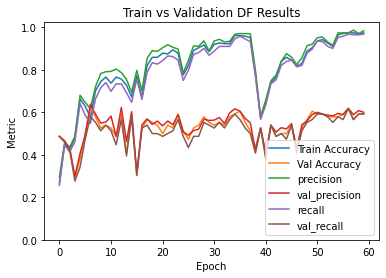

In [43]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history2.history['precision'], label = 'precision')
plt.plot(history2.history['val_precision'], label = 'val_precision')
plt.plot(history2.history['recall'], label = 'recall')
plt.plot(history2.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation DF Results');

model still over fit 

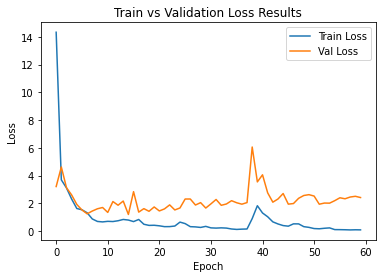

In [44]:
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [53]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [45]:
model2.evaluate(test_data)

preds2 = model2.predict(test_data)
preds2 = np.argmax(preds2, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds2)

3/3 [==============================] - 1s 221ms/step - loss: 2.4144 - accuracy: 0.5921 - recall: 0.5921 - precision: 0.6000


#### Adding Results to DF

In [46]:
results_df2['test_accuracy'].iloc[2] =  0.5921

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [47]:
results_df2['test_precision'].iloc[2] =  0.6000

In [48]:
results_df2['test_recall'].iloc[2] =  0.5921

#### Confusion Matrix

In [49]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             2       5             0     0
normal               0      17             8     9
otitis_media         0       3             9     4
tube                 0       1             1    17


this model did well with classifying normal and tube pictures correctly 

#### Classification Report 

In [50]:
print(classification_report(test_data_values, preds2, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       1.00      0.29      0.44         7
      normal       0.65      0.50      0.57        34
otitis_media       0.50      0.56      0.53        16
        tube       0.57      0.89      0.69        19

    accuracy                           0.59        76
   macro avg       0.68      0.56      0.56        76
weighted avg       0.63      0.59      0.58        76



higher otitis media recall score than previous models 0.56 and higher otitis media f1 score than previous moels 0.53

## Model 3: Changing Layers and Using Early Stopping 

In [140]:
early_stop = EarlyStopping(monitor = 'val_recall', patience = 5)

Will use val recall since this will be the mose imortant metric to consider. Want to reduce the amount of false negative.

In [61]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(4, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [62]:
history3 = model3.fit(train_data, epochs = 80, validation_data = test_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
10/10 [==============================] - 6s 579ms/step - loss: 32.4316 - accuracy: 0.3301 - recall: 0.3205 - precision: 0.3534 - val_loss: 9.1425 - val_accuracy: 0.3026 - val_recall: 0.3026 - val_precision: 0.3026
Epoch 2/80
10/10 [==============================] - 5s 484ms/step - loss: 6.9390 - accuracy: 0.4295 - recall: 0.4295 - precision: 0.4295 - val_loss: 6.4125 - val_accuracy: 0.3158 - val_recall: 0.2895 - val_precision: 0.3099
Epoch 3/80
10/10 [==============================] - 4s 451ms/step - loss: 4.7281 - accuracy: 0.5705 - recall: 0.5641 - precision: 0.5696 - val_loss: 9.1775 - val_accuracy: 0.3026 - val_recall: 0.3026 - val_precision: 0.3026
Epoch 4/80
10/10 [==============================] - 4s 452ms/step - loss: 2.8962 - accuracy: 0.6282 - recall: 0.6250 - precision: 0.6331 - val_loss: 3.7668 - val_accuracy: 0.5658 - val_recall: 0.5658 - val_precision: 0.5658
Epoch 5/80
10/10 [==============================] - 5s 510ms/step - loss: 1.9325 - accuracy: 0.6923 - r

#### Adding Results to DF

In [51]:
results_df2['train_accuracy'].iloc[3] =  0.5801

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
results_df2['train_recall'].iloc[3] = 0.5801

In [53]:
results_df2['train_precision'].iloc[3] = 0.5820

In [54]:
results_df2['val_accuracy'].iloc[3] = 0.4737

In [55]:
results_df2['val_recall'].iloc[3] = 0.4737

In [56]:
results_df2['val_precision'].iloc[3] = 0.4800

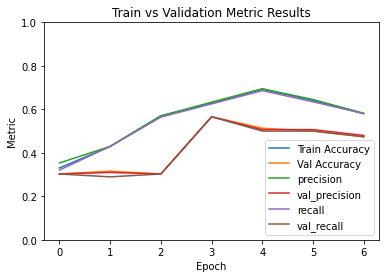

In [69]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history3.history['precision'], label = 'precision')
plt.plot(history3.history['val_precision'], label = 'val_precision')
plt.plot(history3.history['recall'], label = 'recall')
plt.plot(history3.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


model still overfit but less than previous models 

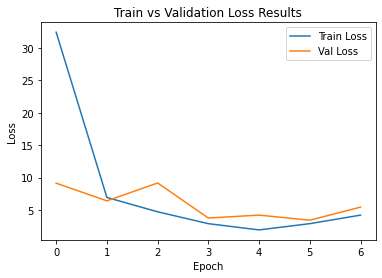

In [70]:
plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [71]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [431]:
model3.evaluate(test_data)

preds3 = model3.predict(test_data)
preds3 = np.argmax(preds3, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds3)

3/3 [==============================] - 1s 223ms/step - loss: 5.4503 - accuracy: 0.4737 - recall: 0.4737 - precision: 0.4800


#### Adding Results to DF

In [59]:
results_df2['test_precision'].iloc[3] =  0.4800

In [58]:
results_df2['test_recall'].iloc[3] = 0.4737

In [36]:
results_df2['test_accuracy'].iloc[3] = 0.4737

#### Confusion Matrix

In [432]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             7       0             0     0
normal              12       4            16     2
otitis_media         0       1            11     4
tube                 1       3             1    14


This model did better at classifying otitis media correctly than previous models, model also did well at classifying tube pictures as well

#### Classification Report 

In [433]:
print(classification_report(test_data_values, preds3, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#precision:TP/(TP+FP)
#recall:TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.35      1.00      0.52         7
      normal       0.50      0.12      0.19        34
otitis_media       0.39      0.69      0.50        16
        tube       0.70      0.74      0.72        19

    accuracy                           0.47        76
   macro avg       0.49      0.64      0.48        76
weighted avg       0.51      0.47      0.42        76



highest otitis media recall score thus far with recall for otitis media at 0.69 and f1 score at 0.50

## Model 4: Changing Layers and Dropout

In [78]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(50, activation = 'relu'))
model4.add(Dense(4, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [79]:
history4 = model4.fit(train_data, epochs = 80, validation_data = test_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 6s 530ms/step - loss: 35.6876 - accuracy: 0.3590 - recall: 0.3301 - precision: 0.3679 - val_loss: 13.4473 - val_accuracy: 0.2500 - val_recall: 0.2500 - val_precision: 0.2500
Epoch 2/80
10/10 [==============================] - 5s 493ms/step - loss: 17.6590 - accuracy: 0.3365 - recall: 0.3365 - precision: 0.3365 - val_loss: 7.2910 - val_accuracy: 0.3947 - val_recall: 0.3947 - val_precision: 0.3947
Epoch 3/80
10/10 [==============================] - 5s 507ms/step - loss: 9.7781 - accuracy: 0.3686 - recall: 0.3654 - precision: 0.3689 - val_loss: 2.9860 - val_accuracy: 0.5132 - val_recall: 0.5000 - val_precision: 0.5205
Epoch 4/80
10/10 [==============================] - 5s 503ms/step - loss: 5.4090 - accuracy: 0.4167 - recall: 0.4103 - precision: 0.4197 - val_loss: 2.4617 - val_accuracy: 0.5526 - val_recall: 0.5526 - val_precision: 0.5600
Epoch 5/80
10/10 [==============================] - 5s 498ms/step - loss: 3.0580 - accuracy: 0.5224 -

#### Adding Results to DF

In [265]:
results_df2['train_accuracy'].iloc[4] =  0.6603

In [266]:
results_df2['train_recall'].iloc[4] = 0.5385 

In [267]:
results_df2['train_precision'].iloc[4] = 0.7706

In [268]:
results_df2['val_accuracy'].iloc[4] = 0.5658

In [269]:
results_df2['val_recall'].iloc[4] = 0.5000

In [270]:
results_df2['val_precision'].iloc[4] = 0.6129

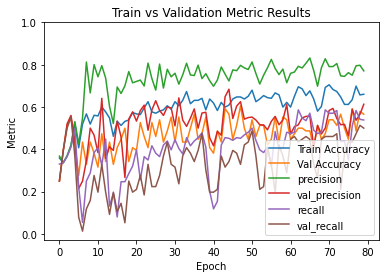

In [86]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history4.history['precision'], label = 'precision')
plt.plot(history4.history['val_precision'], label = 'val_precision')
plt.plot(history4.history['recall'], label = 'recall')
plt.plot(history4.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');



model not learning that much per epoch, possibly too much regularization 

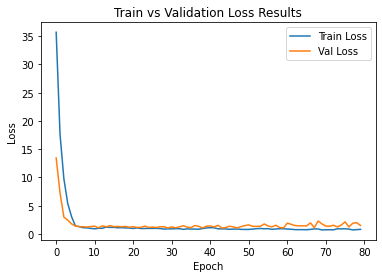

In [87]:
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [88]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [428]:
model4.evaluate(test_data)

preds4 = model4.predict(test_data)
preds4 = np.argmax(preds4, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds4)

3/3 [==============================] - 1s 240ms/step - loss: 1.4986 - accuracy: 0.5658 - recall: 0.5000 - precision: 0.6129


#### Adding Results to DF

In [60]:
results_df2['test_accuracy'].iloc[4] = 0.5658

In [61]:
results_df2['test_recall'].iloc[4] = 0.5000

In [62]:
results_df2['test_precision'].iloc[4] = 0.6129

#### Confusion Matrix 

In [429]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       7             0     0
normal               0      23             7     4
otitis_media         0       4             4     8
tube                 0       3             0    16


Model does well classifying normal and tube pictures but fails to identify any effusion pictures correctly

#### Classification Report 

In [430]:
print(classification_report(test_data_values, preds4, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.62      0.68      0.65        34
otitis_media       0.36      0.25      0.30        16
        tube       0.57      0.84      0.68        19

    accuracy                           0.57        76
   macro avg       0.39      0.44      0.41        76
weighted avg       0.50      0.57      0.52        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


lower f1 score and recall score for otitis media than previous model

## Model 5: Kernal Regularizer with Dropout

In [95]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(50, activation = 'relu', kernel_regularizer = l2(0.1)))
model5.add(Dense(4, activation = 'softmax'))

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [96]:
history5 = model5.fit(train_data, epochs = 80, validation_data = test_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 6s 528ms/step - loss: 26.4919 - accuracy: 0.2885 - recall: 0.2821 - precision: 0.3045 - val_loss: 13.2634 - val_accuracy: 0.4474 - val_recall: 0.4474 - val_precision: 0.4474
Epoch 2/80
10/10 [==============================] - 5s 489ms/step - loss: 15.6732 - accuracy: 0.4038 - recall: 0.4038 - precision: 0.4038 - val_loss: 14.1348 - val_accuracy: 0.1974 - val_recall: 0.1974 - val_precision: 0.1974
Epoch 3/80
10/10 [==============================] - 5s 499ms/step - loss: 10.7592 - accuracy: 0.4006 - recall: 0.4006 - precision: 0.4006 - val_loss: 4.3019 - val_accuracy: 0.4868 - val_recall: 0.4868 - val_precision: 0.4868
Epoch 4/80
10/10 [==============================] - 5s 489ms/step - loss: 3.6584 - accuracy: 0.5064 - recall: 0.5000 - precision: 0.5166 - val_loss: 2.3128 - val_accuracy: 0.5263 - val_recall: 0.5000 - val_precision: 0.5507
Epoch 5/80
10/10 [==============================] - 5s 497ms/step - loss: 2.3589 - accuracy: 0.4615

#### Adding Results to DF

In [63]:
results_df2['train_accuracy'].iloc[5] = 0.6186

In [64]:
results_df2['train_recall'].iloc[5] = 0.4231

In [65]:
results_df2['train_precision'].iloc[5] = 0.7543

In [66]:
results_df2['val_accuracy'].iloc[5] = 0.3816

In [67]:
results_df2['val_recall'].iloc[5] = 0.2632 

In [68]:
results_df2['val_precision'].iloc[5] = 0.4878

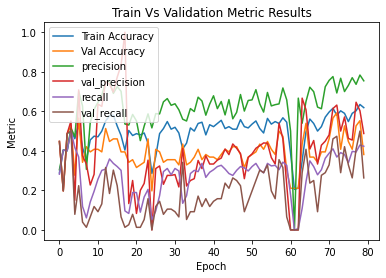

In [103]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history5.history['precision'], label = 'precision')
plt.plot(history5.history['val_precision'], label = 'val_precision')
plt.plot(history5.history['recall'], label = 'recall')
plt.plot(history5.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train Vs Validation Metric Results');

slow learning process not much information gained from each epoch

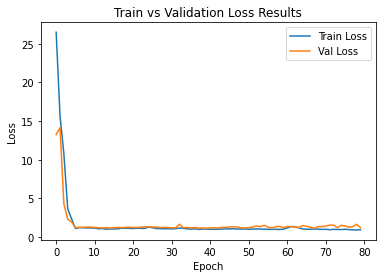

In [104]:
plt.plot(history5.history['loss'], label = 'Train Loss')
plt.plot(history5.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [105]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [425]:
model5.evaluate(test_data)

preds5 = model5.predict(test_data)
preds5 = np.argmax(preds5, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds5)

3/3 [==============================] - 1s 250ms/step - loss: 1.2241 - accuracy: 0.3816 - recall: 0.2632 - precision: 0.4878


#### Adding Results to DF

In [69]:
results_df2['test_accuracy'].iloc[5] = 0.3816

In [70]:
results_df2['test_recall'].iloc[5] = 0.2632

In [71]:
results_df2['test_precision'].iloc[5]  =  0.4878

#### Confusion Matrix

In [426]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       2             5     0
normal               0      17            17     0
otitis_media         0       8             8     0
tube                 0      13             2     4


model not showing any improvements from previous models

#### Classification Report 

In [427]:
print(classification_report(test_data_values, preds5, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.42      0.50      0.46        34
otitis_media       0.25      0.50      0.33        16
        tube       1.00      0.21      0.35        19

    accuracy                           0.38        76
   macro avg       0.42      0.30      0.29        76
weighted avg       0.49      0.38      0.36        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model scoring at 0.5 recall for otitis media and 0.33 f1 score, Model 3 still performed better when looking at f1 score and recall in comparison 

## Model 6: Adding Convolutional Operation

In [74]:
model6 = Sequential()
model6.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.2))
model6.add(Dense(4, activation = 'softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])


In [75]:
history6 = model6.fit(train_data, epochs = 40, validation_data = test_data,
    batch_size = 32)

Epoch 1/40
10/10 [==============================] - 8s 757ms/step - loss: 27.6003 - accuracy: 0.3205 - recall: 0.3045 - precision: 0.3310 - val_loss: 13.1671 - val_accuracy: 0.4737 - val_recall: 0.4737 - val_precision: 0.4737
Epoch 2/40
10/10 [==============================] - 6s 634ms/step - loss: 6.8274 - accuracy: 0.4968 - recall: 0.4968 - precision: 0.5000 - val_loss: 3.5567 - val_accuracy: 0.5526 - val_recall: 0.5526 - val_precision: 0.5526
Epoch 3/40
10/10 [==============================] - 7s 665ms/step - loss: 3.0716 - accuracy: 0.6186 - recall: 0.5994 - precision: 0.6254 - val_loss: 1.6183 - val_accuracy: 0.5921 - val_recall: 0.5395 - val_precision: 0.6119
Epoch 4/40
10/10 [==============================] - 6s 643ms/step - loss: 0.7832 - accuracy: 0.7949 - recall: 0.7788 - precision: 0.8209 - val_loss: 0.9396 - val_accuracy: 0.6447 - val_recall: 0.6184 - val_precision: 0.7121
Epoch 5/40
10/10 [==============================] - 7s 666ms/step - loss: 0.4483 - accuracy: 0.8590 - 

#### Adding Results to DF

In [78]:
results_df2['train_accuracy'].iloc[6] =1

results_df2['train_precision'].iloc[6] =  1

results_df2['train_recall'].iloc[6] = 1

results_df2['val_accuracy'].iloc[6] = 0.6579 

results_df2['val_precision'].iloc[6] =  00.6757

results_df2['val_recall'].iloc[6] = 0.6579

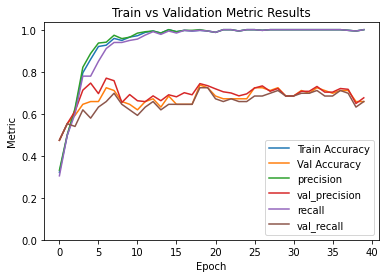

In [79]:
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history6.history['precision'], label = 'precision')
plt.plot(history6.history['val_precision'], label = 'val_precision')
plt.plot(history6.history['recall'], label = 'recall')
plt.plot(history6.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

not learning much more information after 5 epochs

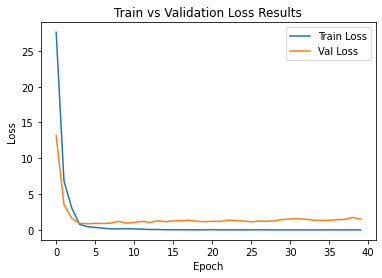

In [80]:
plt.plot(history6.history['loss'], label = 'Train Loss')
plt.plot(history6.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [117]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [81]:
model6.evaluate(test_data)

preds6 = model6.predict(test_data)
preds6 = np.argmax(preds6, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds6)

3/3 [==============================] - 1s 262ms/step - loss: 1.4976 - accuracy: 0.6579 - recall: 0.6579 - precision: 0.6757


#### Adding Results to DF

In [82]:
results_df2['test_accuracy'].iloc[6] =0.6579

results_df2['test_precision'].iloc[6] = 0.6757

results_df2['test_recall'].iloc[6] = 0.6579

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Confusion Matrix

In [83]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             3       3             1     0
normal               0      18            14     2
otitis_media         0       0            14     2
tube                 0       1             3    15


Model does well at identifying normal, otitis media and tube but fails to identify that many effusion pictures 

#### Classification Report 

In [84]:
print(classification_report(test_data_values, preds6, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       1.00      0.43      0.60         7
      normal       0.82      0.53      0.64        34
otitis_media       0.44      0.88      0.58        16
        tube       0.79      0.79      0.79        19

    accuracy                           0.66        76
   macro avg       0.76      0.66      0.65        76
weighted avg       0.75      0.66      0.66        76



recall for otitis media 0.88 and f1 score 0.58, one of the better models so far with highest f1 score and recall metrics thus far

## Model 7: Convolutional Operation and Max Pooling

In [122]:
model7 = Sequential()
model7.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model7.add(MaxPool2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(Dropout(0.2))
model7.add(Dense(4, activation = 'softmax'))

model7.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [123]:
history7 = model7.fit(train_data, epochs = 60, validation_data = test_data,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 7s 633ms/step - loss: 17.4665 - accuracy: 0.3494 - recall: 0.3365 - precision: 0.3737 - val_loss: 4.1144 - val_accuracy: 0.3158 - val_recall: 0.3026 - val_precision: 0.3151
Epoch 2/60
10/10 [==============================] - 6s 621ms/step - loss: 3.9504 - accuracy: 0.4904 - recall: 0.4872 - precision: 0.5050 - val_loss: 2.5733 - val_accuracy: 0.4737 - val_recall: 0.3816 - val_precision: 0.4531
Epoch 3/60
10/10 [==============================] - 6s 628ms/step - loss: 1.7070 - accuracy: 0.5353 - recall: 0.4551 - precision: 0.5525 - val_loss: 1.6104 - val_accuracy: 0.3816 - val_recall: 0.2763 - val_precision: 0.3962
Epoch 4/60
10/10 [==============================] - 6s 583ms/step - loss: 0.9099 - accuracy: 0.6731 - recall: 0.5353 - precision: 0.7557 - val_loss: 0.9664 - val_accuracy: 0.5921 - val_recall: 0.4079 - val_precision: 0.7561
Epoch 5/60
10/10 [==============================] - 6s 545ms/step - loss: 0.7434 - accuracy: 0.7436 - r

#### Adding Results to DF

In [85]:
results_df2['train_accuracy'].iloc[7] = 0.9872

results_df2['train_precision'].iloc[7] = 0.9871

results_df2['train_recall'].iloc[7] = 0.9840

results_df2['val_accuracy'].iloc[7] = 0.7500

results_df2['val_precision'].iloc[7] =  0.7703

results_df2['val_recall'].iloc[7] = 0.7500

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


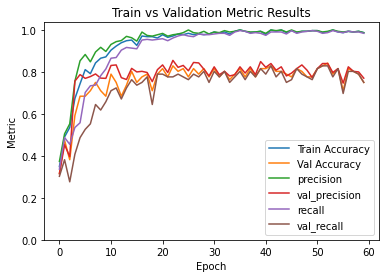

In [125]:
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history7.history['precision'], label = 'precision')
plt.plot(history7.history['val_precision'], label = 'val_precision')
plt.plot(history7.history['recall'], label = 'recall')
plt.plot(history7.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

model overfit, validation metrics improving 

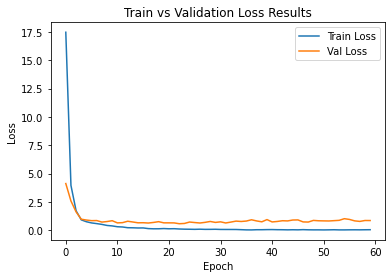

In [126]:
plt.plot(history7.history['loss'], label = 'Train Loss')
plt.plot(history7.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [127]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [418]:
model7.evaluate(test_data)

preds7 = model7.predict(test_data)
preds7 = np.argmax(preds7, axis=1)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds7)

3/3 [==============================] - 1s 263ms/step - loss: 0.8501 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.7703


#### Adding Results to DF

In [86]:
results_df2['test_accuracy'].iloc[7] = 0.7500

results_df2['test_precision'].iloc[7] = 0.7703

results_df2['test_recall'].iloc[7] = 0.7500

#### Confusion Matrix

In [419]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion','normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             3       2             2     0
normal               0      29             2     3
otitis_media         0       1            10     5
tube                 2       1             1    15


model doing well at classifying normal, otitis media and tube. able to idenfity similiar amount of effusion pictures to last model

#### Classification Report 

In [420]:
print(classification_report(test_data_values, preds7, target_names = [ 'effusion','normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.60      0.43      0.50         7
      normal       0.88      0.85      0.87        34
otitis_media       0.67      0.62      0.65        16
        tube       0.65      0.79      0.71        19

    accuracy                           0.75        76
   macro avg       0.70      0.67      0.68        76
weighted avg       0.75      0.75      0.75        76



recall score for otitis media 0.62 and f1 score for otitis media 0.65. Highest f1 score for otitis media thus far

## Model 8: Adding Prebuilt Networks InceptionV3

In [439]:
train_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True)

In [440]:
test_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True)

In [445]:
train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/train/', target_size = (299, 299))

Found 312 images belonging to 4 classes.


In [446]:
test_data_aug = test_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images_2/test/', target_size = (299, 299), shuffle = False)

Found 76 images belonging to 4 classes.


In [94]:
conv_base = InceptionV3(include_top=False, input_shape = (150, 150, 3))

In [95]:
preds = conv_base.predict(train_aug)

In [96]:
preds_test = conv_base.predict(test_data_aug)

In [97]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(100, activation = 'relu'))
model8.add(Dropout(0.2))
model8.add(Dense(4, activation = 'softmax'))

model8.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [98]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_test = test_data_aug.labels 
y_test_binarized = to_categorical(y_test)

In [99]:
history8 = model8.fit(preds, y_train_binarized, epochs = 30, validation_data = (preds_test, y_test_binarized),
    batch_size = 32)

Epoch 1/30
10/10 [==============================] - 1s 62ms/step - loss: 21.0690 - accuracy: 0.2885 - recall: 0.2821 - precision: 0.2943 - val_loss: 7.0082 - val_accuracy: 0.1316 - val_recall: 0.1316 - val_precision: 0.1333
Epoch 2/30
10/10 [==============================] - 0s 35ms/step - loss: 3.1019 - accuracy: 0.2885 - recall: 0.1122 - precision: 0.2188 - val_loss: 1.3994 - val_accuracy: 0.4342 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/30
10/10 [==============================] - 0s 34ms/step - loss: 1.3711 - accuracy: 0.4359 - recall: 0.0417 - precision: 0.5652 - val_loss: 1.4025 - val_accuracy: 0.3947 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/30
10/10 [==============================] - 0s 33ms/step - loss: 1.3321 - accuracy: 0.4583 - recall: 0.0417 - precision: 0.7647 - val_loss: 1.3801 - val_accuracy: 0.4474 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/30
10/10 [==============================] - 0s 34ms/step - loss: 1.3170 - a

#### Adding Results to DF

In [101]:
results_df2['train_accuracy'].iloc[8] = 0.6538

results_df2['train_recall'].iloc[8] = 0.4615

results_df2['train_precision'].iloc[8] = 0.8136

results_df2['val_accuracy'].iloc[8] =   0.3816

results_df2['val_recall'].iloc[8] =  0.1974

results_df2['val_precision'].iloc[8] = 0.4286


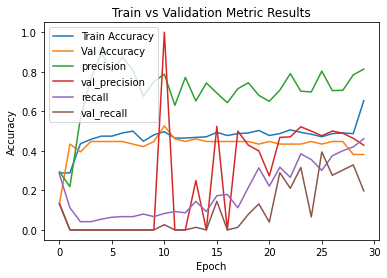

In [102]:
plt.plot(history8.history['accuracy'], label='Train Accuracy')
plt.plot(history8.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history8.history['precision'], label = 'precision')
plt.plot(history8.history['val_precision'], label = 'val_precision')
plt.plot(history8.history['recall'], label = 'recall')
plt.plot(history8.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Metric Results');

overfit and worsening validation metrics, this pretrained network might not be helpful for this type of medical image 

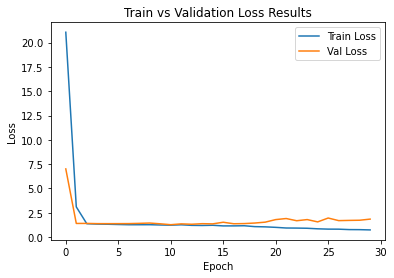

In [103]:
plt.plot(history8.history['loss'], label = 'Train Loss')
plt.plot(history8.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [145]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [104]:
test_preds = conv_base.predict(test_data_aug)

In [105]:
model8.evaluate(test_preds)

preds8 = model8.predict(test_preds)
preds8 = np.argmax(preds8, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds8)

3/3 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Results to DF

In [106]:
results_df2['test_accuracy'].iloc[8] = 0

results_df2['test_recall'].iloc[8] = 0

results_df2['test_precision'].iloc[8] = 0

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Confusion Matrix

In [107]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


              effusion  normal  otitis_media  tube
effusion             0       6             1     0
normal               0      26             7     1
otitis_media         0      13             2     1
tube                 0      11             8     0


previous models performing better

#### Classification Matrix 

In [109]:
print(classification_report(test_data_values, preds8, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.46      0.76      0.58        34
otitis_media       0.11      0.12      0.12        16
        tube       0.00      0.00      0.00        19

    accuracy                           0.37        76
   macro avg       0.14      0.22      0.17        76
weighted avg       0.23      0.37      0.28        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


lower f1 score and recalls score for otitis media than previous models

## Model 9: Adding Prebuilt Networks Xception

In [151]:
conv_base9 = Xception(include_top=False, input_shape = (150, 150, 3))

In [152]:
preds9 = conv_base9.predict(train_aug)

In [153]:
preds_test9 = conv_base9.predict(test_data_aug)

In [154]:
model9 = Sequential()
model9.add(GlobalAveragePooling2D())
model9.add(Dense(100, activation = 'relu'))
model9.add(Dropout(0.3))
model9.add(Dense(4, activation = 'softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [155]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_test = test_data_aug.labels 
y_test_binarized = to_categorical(y_test)

In [156]:
history9 = model9.fit(preds9, y_train_binarized, epochs = 30, validation_data = (preds_test9, y_test_binarized),
    batch_size = 32)

Epoch 1/30
10/10 [==============================] - 1s 36ms/step - loss: 1.3359 - accuracy: 0.3718 - recall: 0.1314 - precision: 0.4607 - val_loss: 1.2528 - val_accuracy: 0.4868 - val_recall: 0.0132 - val_precision: 0.3333
Epoch 2/30
10/10 [==============================] - 0s 9ms/step - loss: 1.2359 - accuracy: 0.4583 - recall: 0.1859 - precision: 0.5043 - val_loss: 1.2448 - val_accuracy: 0.4737 - val_recall: 0.1053 - val_precision: 0.7273
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 1.1733 - accuracy: 0.4359 - recall: 0.1218 - precision: 0.7600 - val_loss: 1.2765 - val_accuracy: 0.4474 - val_recall: 0.2368 - val_precision: 0.5000
Epoch 4/30
10/10 [==============================] - 0s 10ms/step - loss: 1.1042 - accuracy: 0.5096 - recall: 0.3301 - precision: 0.6561 - val_loss: 1.2945 - val_accuracy: 0.4079 - val_recall: 0.1579 - val_precision: 0.5455
Epoch 5/30
10/10 [==============================] - 0s 10ms/step - loss: 1.0523 - accuracy: 0.6026 - recall: 

#### Adding Results to DF

In [110]:
results_df2['train_accuracy'].iloc[9] = 0.9936

results_df2['train_recall'].iloc[9] =  0.9872

results_df2['train_precision'].iloc[9] = 0.9935

results_df2['val_accuracy'].iloc[9] = 0.3684

results_df2['val_recall'].iloc[9] = 0.3158

results_df2['val_precision'].iloc[9] = 0.3636 

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


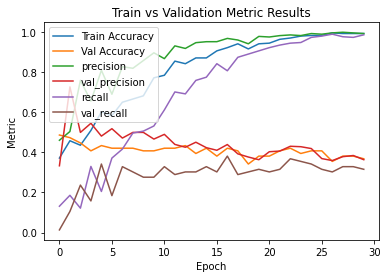

In [158]:
plt.plot(history9.history['accuracy'], label='Train Accuracy')
plt.plot(history9.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history9.history['precision'], label = 'precision')
plt.plot(history9.history['val_precision'], label = 'val_precision')
plt.plot(history9.history['recall'], label = 'recall')
plt.plot(history9.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

overfit and worsening validation metrics, this pretrained network might not be helpful for this type of medical image

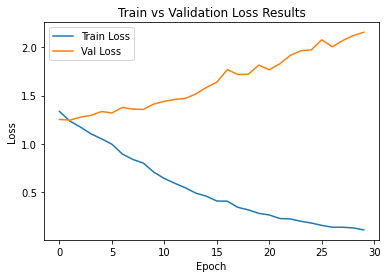

In [159]:
plt.plot(history9.history['loss'], label = 'Train Loss')
plt.plot(history9.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [160]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [410]:
preds9_test = conv_base9.predict(test_data_aug)
model9.evaluate(preds9_test)

preds9 = model9.predict(preds9_test)
preds9 = np.argmax(preds9, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds9)

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Results to DF

In [111]:

results_df2['test_accuracy'].iloc[9] = 0

results_df2['test_recall'].iloc[9] = 0

results_df2['test_precision'].iloc[9] = 0


#### Confusion Matrix

In [411]:
print(pd.DataFrame(cm, index =['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       4             2     1
normal               0      26             3     5
otitis_media         0      12             2     2
tube                 0      11             6     2


other models performing better

#### Classification Report

In [164]:
print(classification_report(test_data_values, preds9, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.46      0.62      0.52        34
otitis_media       0.29      0.12      0.17        16
        tube       0.36      0.26      0.30        19

    accuracy                           0.37        76
   macro avg       0.27      0.25      0.25        76
weighted avg       0.35      0.37      0.35        76



lower f1 score and recall score for otitis media than previous models

## Model 10: Adding Prebuilt Networks VGG16

In [165]:
conv_base10 = VGG16(include_top=False, input_shape = (150, 150, 3))

In [166]:
preds10 = conv_base10.predict(train_aug)

In [167]:
preds_test10 = conv_base10.predict(test_data_aug)

In [168]:
model10 = Sequential()
model10.add(GlobalAveragePooling2D())
model10.add(Dense(100, activation = 'relu'))
model10.add(Dropout(0.3))
model10.add(Dense(4, activation = 'softmax'))

model10.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [169]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_test = test_data_aug.labels 
y_test_binarized = to_categorical(y_test)

In [170]:
history10 = model10.fit(preds10, y_train_binarized, epochs = 40, validation_data = (preds_test10, y_test_binarized),
    batch_size = 30)

Epoch 1/40
11/11 [==============================] - 1s 28ms/step - loss: 1.3507 - accuracy: 0.3750 - recall: 0.1538 - precision: 0.4615 - val_loss: 1.3066 - val_accuracy: 0.4474 - val_recall: 0.4342 - val_precision: 0.4400
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 1.3201 - accuracy: 0.4167 - recall: 0.2212 - precision: 0.4726 - val_loss: 1.2488 - val_accuracy: 0.4474 - val_recall: 0.0263 - val_precision: 0.6667
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 1.2746 - accuracy: 0.4167 - recall: 0.0833 - precision: 0.5200 - val_loss: 1.2488 - val_accuracy: 0.4474 - val_recall: 0.1579 - val_precision: 0.6316
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 1.2768 - accuracy: 0.4391 - recall: 0.2051 - precision: 0.4741 - val_loss: 1.2518 - val_accuracy: 0.4474 - val_recall: 0.2105 - val_precision: 0.5000
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 1.2699 - accuracy: 0.4455 - recall: 0.1

#### Adding Results to DF

In [112]:
results_df2['train_accuracy'].iloc[10] =0.4872 

results_df2['train_recall'].iloc[10] = 0.2532

results_df2['train_precision'].iloc[10] = 0.5852

results_df2['val_accuracy'].iloc[10] = 0.4474

results_df2['val_recall'].iloc[10] = 0.1184

results_df2['val_precision'].iloc[10] = 0.4500


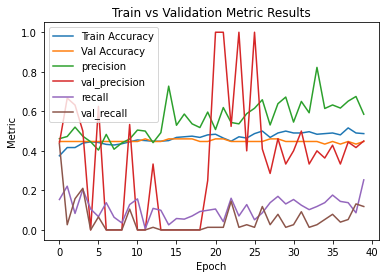

In [172]:
plt.plot(history10.history['accuracy'], label='Train Accuracy')
plt.plot(history10.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history10.history['precision'], label = 'precision')
plt.plot(history10.history['val_precision'], label = 'val_precision')
plt.plot(history10.history['recall'], label = 'recall')
plt.plot(history10.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Not learning much from this model or pretrained network 

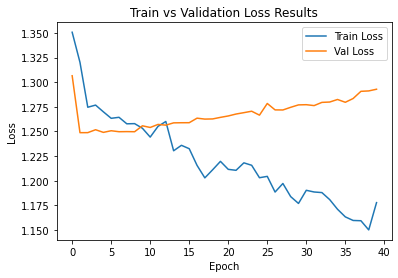

In [173]:
plt.plot(history10.history['loss'], label = 'Train Loss')
plt.plot(history10.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [174]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [175]:
preds10_test = conv_base10.predict(test_data_aug)

In [405]:
model10.evaluate(preds10_test)

preds10 = model10.predict(preds10_test)
preds10 = np.argmax(preds10, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds10)

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Result to DF

In [300]:
results_df2['test_accuracy'].iloc[10] = 0 

results_df2['test_recall'].iloc[10] = 0

results_df2['test_precision'].iloc[10] = 0


#### Confusion Matrix 

In [406]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       6             0     1
normal               0      34             0     0
otitis_media         0      15             0     1
tube                 0      17             1     1


earlier models performing better

#### Classification Report 

In [407]:
print(classification_report(test_data_values, preds10, target_names = [ 'effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.47      1.00      0.64        34
otitis_media       0.00      0.00      0.00        16
        tube       0.33      0.05      0.09        19

    accuracy                           0.46        76
   macro avg       0.20      0.26      0.18        76
weighted avg       0.29      0.46      0.31        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0 recall and f1 score for otitis media 

## Model 11: Adding Prebuilt Networks MobileNetV2

In [180]:
conv_base11 = MobileNetV2(include_top=False, input_shape = (150, 150, 3))

preds11 = conv_base11.predict(train_aug)

preds_test11 = conv_base11.predict(test_data_aug)

model11 = Sequential()
model11.add(GlobalAveragePooling2D())
model11.add(Dense(100, activation = 'relu'))
model11.add(Dropout(0.3))
model11.add(Dense(50, activation = 'relu'))
model11.add(Dense(4, activation = 'softmax'))

model11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_test = test_data_aug.labels 
y_test_binarized = to_categorical(y_test)

history11 = model11.fit(preds11, y_train_binarized, epochs = 40, validation_data = (preds_test11, y_test_binarized),
    batch_size = 30)



Epoch 1/40
11/11 [==============================] - 1s 29ms/step - loss: 1.3917 - accuracy: 0.4199 - recall: 0.2083 - precision: 0.4037 - val_loss: 1.3164 - val_accuracy: 0.3816 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/40
11/11 [==============================] - 0s 6ms/step - loss: 1.2645 - accuracy: 0.4135 - recall: 0.1090 - precision: 0.4658 - val_loss: 1.3103 - val_accuracy: 0.4474 - val_recall: 0.0658 - val_precision: 0.2778
Epoch 3/40
11/11 [==============================] - 0s 6ms/step - loss: 1.2075 - accuracy: 0.4423 - recall: 0.1859 - precision: 0.6042 - val_loss: 1.3124 - val_accuracy: 0.3947 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/40
11/11 [==============================] - 0s 6ms/step - loss: 1.1842 - accuracy: 0.4615 - recall: 0.1667 - precision: 0.5714 - val_loss: 1.3197 - val_accuracy: 0.4474 - val_recall: 0.1447 - val_precision: 0.3793
Epoch 5/40
11/11 [==============================] - 0s 7ms/step - loss: 1.1562 - accuracy: 0.47

#### Adding Results to DF

In [113]:
results_df2['train_accuracy'].iloc[11] =0.9647

results_df2['train_recall'].iloc[11] =  0.9615 

results_df2['train_precision'].iloc[11] = 0.9772 

results_df2['val_accuracy'].iloc[11] = 0.3026

results_df2['val_recall'].iloc[11] = 0.2763

results_df2['val_precision'].iloc[11] =  0.3000

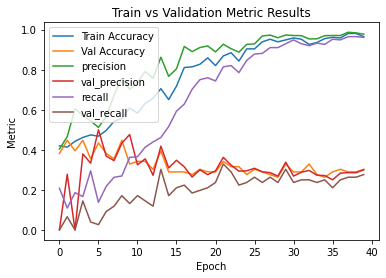

In [182]:
plt.plot(history11.history['accuracy'], label='Train Accuracy')
plt.plot(history11.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history11.history['precision'], label = 'precision')
plt.plot(history11.history['val_precision'], label = 'val_precision')
plt.plot(history11.history['recall'], label = 'recall')
plt.plot(history11.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

overfit and worsening validation metrics, this pretrained network might not be helpful for this type of medical image

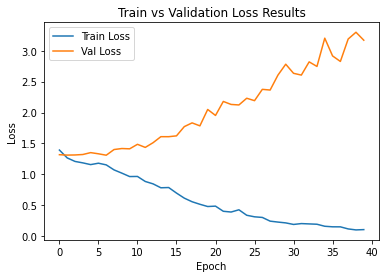

In [183]:
plt.plot(history11.history['loss'], label = 'Train Loss')
plt.plot(history11.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [184]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [185]:
preds11_test = conv_base11.predict(test_data_aug)

In [402]:
model11.evaluate(preds11_test)

preds11 = model11.predict(preds11_test)
preds11 = np.argmax(preds11, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds11)

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Result to DF

In [114]:
results_df2['test_accuracy'].iloc[11] = 0

results_df2['test_recall'].iloc[11] = 0

results_df2['test_precision'].iloc[11] = 0

#### Confusion Matrix

In [403]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube' ], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       3             1     3
normal               3      19             6     6
otitis_media         1       6             4     5
tube                 2      11             0     6


earlier models performing better

#### Classification Report 

In [404]:
print(classification_report(test_data_values, preds11, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.49      0.56      0.52        34
otitis_media       0.36      0.25      0.30        16
        tube       0.30      0.32      0.31        19

    accuracy                           0.38        76
   macro avg       0.29      0.28      0.28        76
weighted avg       0.37      0.38      0.37        76



recall for otitis media 0.25 and f1 score 0.30, earlier models with higher f1 score and recall score for otitis media

## Best Model:Model 12: Experimenting with Convolutional Layers and Pooling (Adding Augmented Images)

In [447]:
model12 = Sequential()
model12.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu', input_shape = (299, 299, 3)))
model12.add(MaxPool2D((2, 2)))
model12.add(Flatten())
model12.add(Dense(100, activation = 'relu'))
model12.add(Dropout(0.1))
model12.add(Dense(4, activation = 'softmax'))

model12.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [448]:
history12 = model12.fit(train_aug, epochs = 80, validation_data = test_data_aug)

Epoch 1/80
10/10 [==============================] - 13s 1s/step - loss: 47.8968 - accuracy: 0.2276 - recall: 0.1987 - precision: 0.2214 - val_loss: 18.8329 - val_accuracy: 0.4605 - val_recall: 0.4605 - val_precision: 0.4605
Epoch 2/80
10/10 [==============================] - 12s 1s/step - loss: 21.9648 - accuracy: 0.3782 - recall: 0.3782 - precision: 0.3782 - val_loss: 8.0978 - val_accuracy: 0.4211 - val_recall: 0.4211 - val_precision: 0.4267
Epoch 3/80
10/10 [==============================] - 11s 1s/step - loss: 9.8686 - accuracy: 0.4840 - recall: 0.4840 - precision: 0.4855 - val_loss: 8.0575 - val_accuracy: 0.3421 - val_recall: 0.3421 - val_precision: 0.3467
Epoch 4/80
10/10 [==============================] - 11s 1s/step - loss: 5.4330 - accuracy: 0.4455 - recall: 0.4455 - precision: 0.4484 - val_loss: 4.5509 - val_accuracy: 0.2763 - val_recall: 0.2763 - val_precision: 0.2763
Epoch 5/80
10/10 [==============================] - 11s 1s/step - loss: 2.7516 - accuracy: 0.5513 - recall: 0

#### Adding Result to DF

In [298]:
results_df2['train_accuracy'].iloc[12] = 0.8205

results_df2['train_recall'].iloc[12] =0.7372

results_df2['train_precision'].iloc[12] = 0.8679

results_df2['val_accuracy'].iloc[12] =0.5789

results_df2['val_recall'].iloc[12] = 0.5395

results_df2['val_precision'].iloc[12] =  0.6949

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


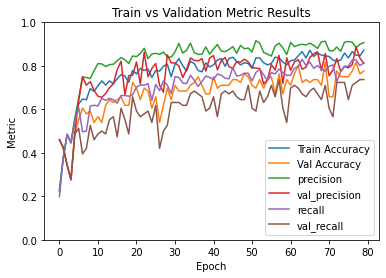

In [449]:
plt.plot(history12.history['accuracy'], label='Train Accuracy')
plt.plot(history12.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history12.history['precision'], label = 'precision')
plt.plot(history12.history['val_precision'], label = 'val_precision')
plt.plot(history12.history['recall'], label = 'recall')
plt.plot(history12.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


model still slightly overfit but improving validation metrics 

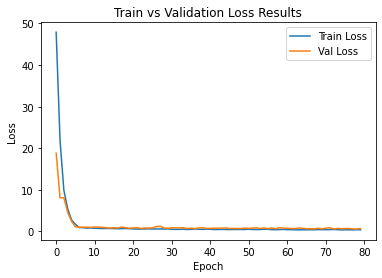

In [450]:
plt.plot(history12.history['loss'], label = 'Train Loss')
plt.plot(history12.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [195]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [451]:
model12.evaluate(test_data_aug)

preds12 = model12.predict(test_data_aug)
preds12 = np.argmax(preds12, axis=1)

test_data_values = test_data_aug.labels 
cm = confusion_matrix(test_data_values, preds12)

3/3 [==============================] - 2s 522ms/step - loss: 0.7319 - accuracy: 0.7237 - recall: 0.6711 - precision: 0.7727


#### Adding Results to DF

In [462]:
results_df2['test_accuracy'].iloc[12] =0.7237

results_df2['test_recall'].iloc[12] =  0.6711

results_df2['test_precision'].iloc[12] = 0.7727


/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Confusion Matrix

In [605]:
cm = confusion_matrix(test_data_values, preds12)
cm_df = pd.DataFrame(cm, index = ['Effusion', 'Healthy', 'Infected', 'TM Tube'], columns = ['Effusion','Healthy', 'Infected', 'TM Tube'])
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match
cm_df

,Effusion,Healthy,Infected,TM Tube
Effusion,3,2,1,1
Healthy,7,26,1,0
Infected,0,0,16,0
TM Tube,0,2,1,16


<Figure size 432x288 with 0 Axes>

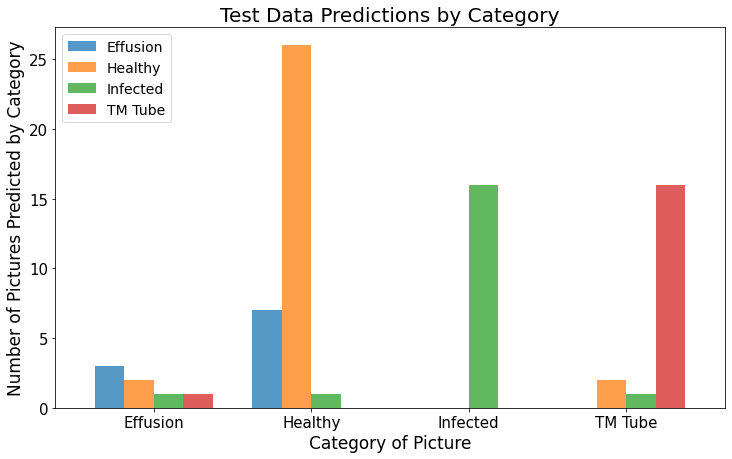

In [612]:
plt.figure();
ax = cm_df.plot(kind="bar", title = "Test Data Predictions by Category", width = 0.75, fontsize = 15, figsize = (12,7), alpha=0.75, rot=0);
ax.legend(["Effusion", "Healthy", "Infected", "TM Tube"], loc=2,fontsize=14);
ax.title.set_size(20)
#ax.set_xticks(["Effusion", "Normal", "Infected", "TM Tube"]);
ax.set_ylabel("Number of Pictures Predicted by Category", fontsize = 17)
ax.set_xlabel("Category of Picture", fontsize = 17);

Model doing very well at classifying normal, otitis media and tube correctly. Model struggles with identifying effusion correctly.

#### Classification Report 

In [453]:
print(classification_report(test_data_values, preds12, target_names = [ 'effusion','normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.30      0.43      0.35         7
      normal       0.87      0.76      0.81        34
otitis_media       0.84      1.00      0.91        16
        tube       0.94      0.84      0.89        19

    accuracy                           0.80        76
   macro avg       0.74      0.76      0.74        76
weighted avg       0.83      0.80      0.81        76



highest f1 and recall score for otitis media thus far with score of 1 for recall and 0.91 for f1-score.

## Model 13: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Average Pool)

In [119]:
model13 = Sequential()
model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model13.add(AveragePooling2D((2, 2)))
model13.add(Flatten())
model13.add(Dense(100, activation = 'relu'))
model13.add(Dropout(0.4))
model13.add(Dense(4, activation = 'softmax'))

model13.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [120]:
history13 = model13.fit(train_aug, epochs = 60, validation_data = test_data_aug,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 10s 1s/step - loss: 15.0127 - accuracy: 0.2981 - recall: 0.2917 - precision: 0.3227 - val_loss: 7.9395 - val_accuracy: 0.2500 - val_recall: 0.2500 - val_precision: 0.2500
Epoch 2/60
10/10 [==============================] - 10s 983ms/step - loss: 3.1629 - accuracy: 0.3622 - recall: 0.2019 - precision: 0.3247 - val_loss: 1.2675 - val_accuracy: 0.4737 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/60
10/10 [==============================] - 9s 908ms/step - loss: 1.4052 - accuracy: 0.4423 - recall: 0.0192 - precision: 0.1935 - val_loss: 1.3067 - val_accuracy: 0.4868 - val_recall: 0.0263 - val_precision: 1.0000
Epoch 4/60
10/10 [==============================] - 9s 896ms/step - loss: 1.3267 - accuracy: 0.4679 - recall: 0.0385 - precision: 0.5714 - val_loss: 1.2335 - val_accuracy: 0.5132 - val_recall: 0.0526 - val_precision: 1.0000
Epoch 5/60
10/10 [==============================] - 9s 931ms/step - loss: 1.3116 - accuracy: 0.4

#### Adding Results to DF

In [130]:
results_df2['train_accuracy'].iloc[13] = 0.6250
results_df2['train_recall'].iloc[13] =0.4968

results_df2['train_precision'].iloc[13] =  0.8378

results_df2['val_accuracy'].iloc[13] =  0.6447

results_df2['val_recall'].iloc[13] = 0.3947 

results_df2['val_precision'].iloc[13] =   0.6818

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


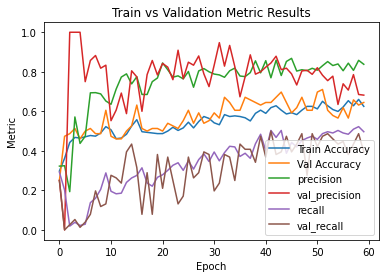

In [124]:
plt.plot(history13.history['accuracy'], label='Train Accuracy')
plt.plot(history13.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history13.history['precision'], label = 'precision')
plt.plot(history13.history['val_precision'], label = 'val_precision')
plt.plot(history13.history['recall'], label = 'recall')
plt.plot(history13.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


not as overfit as other models, validation metrics around .3-.8

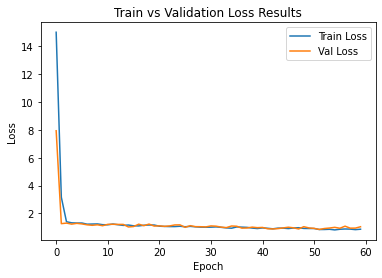

In [125]:
plt.plot(history13.history['loss'], label = 'Train Loss')
plt.plot(history13.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [205]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [126]:
model13.evaluate(test_data_aug)

preds13 = model13.predict(test_data_aug)
preds13 = np.argmax(preds13, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds13)

3/3 [==============================] - 2s 455ms/step - loss: 1.0502 - accuracy: 0.6316 - recall: 0.4211 - precision: 0.6809


#### Adding Results to DF

In [131]:
results_df2['test_accuracy'].iloc[13] =  0.6316

results_df2['test_recall'].iloc[13] = 0.4211

results_df2['test_precision'].iloc[13] = 0.6809


#### Confusion Matrix 

In [128]:
print(pd.DataFrame(cm, index = [ 'effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       7             0     0
normal               0      33             1     0
otitis_media         0       4             5     7
tube                 0      10             1     8


Doing very well at predicting normal correctly

#### Classification Report 

In [129]:
print(classification_report(test_data_values, preds13, target_names = ['effusion','normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.61      0.97      0.75        34
otitis_media       0.71      0.31      0.43        16
        tube       0.53      0.42      0.47        19

    accuracy                           0.61        76
   macro avg       0.46      0.43      0.41        76
weighted avg       0.56      0.61      0.54        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


otitis media recall and f1 score not performing as well as previous models 

## Model 14: Experimenting with Convolutional Layers, Augmented Images, and Pooling (Adding Global Average Pool)

In [210]:
model14 = Sequential()
model14.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model14.add(GlobalAveragePooling2D())
model14.add(Dense(100, activation = 'relu'))
model14.add(Dropout(0.2))
model14.add(Dense(4, activation = 'softmax'))

model14.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [211]:
history14 = model14.fit(train_aug, epochs = 60, validation_data = test_data_aug,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 11s 1s/step - loss: 1.3635 - accuracy: 0.3942 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3387 - val_accuracy: 0.4474 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/60
10/10 [==============================] - 9s 925ms/step - loss: 1.3242 - accuracy: 0.4487 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3028 - val_accuracy: 0.4474 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/60
10/10 [==============================] - 8s 850ms/step - loss: 1.2888 - accuracy: 0.4455 - recall: 0.0032 - precision: 0.2000 - val_loss: 1.2770 - val_accuracy: 0.4474 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/60
10/10 [==============================] - 8s 831ms/step - loss: 1.2737 - accuracy: 0.4455 - recall: 0.0064 - precision: 0.1111 - val_loss: 1.2633 - val_accuracy: 0.4474 - val_recall: 0.0132 - val_precision: 0.1111
Epoch 5/60
10/10 [==============================] - 8s 841ms/step 

#### Adding Results to DF

In [132]:
results_df2['train_accuracy'].iloc[14] =  0.6763 

results_df2['train_recall'].iloc[14] =0.4776

results_df2['train_precision'].iloc[14] =  0.7680 

results_df2['val_accuracy'].iloc[14] =  0.5526

results_df2['val_recall'].iloc[14] = 0.3947

results_df2['val_precision'].iloc[14] =   0.8333


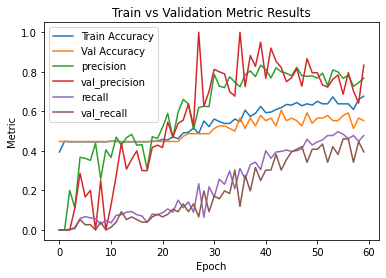

In [213]:
plt.plot(history14.history['accuracy'], label='Train Accuracy')
plt.plot(history14.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history14.history['precision'], label = 'precision')
plt.plot(history14.history['val_precision'], label = 'val_precision')
plt.plot(history14.history['recall'], label = 'recall')
plt.plot(history14.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

slow learing rate 

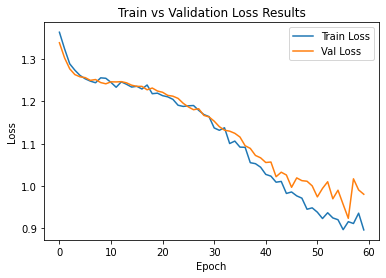

In [214]:
plt.plot(history14.history['loss'], label = 'Train Loss')
plt.plot(history14.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [215]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [391]:
model14.evaluate(test_data_aug)

preds14 = model14.predict(test_data_aug)
preds14 = np.argmax(preds14, axis=1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds14)

3/3 [==============================] - 2s 466ms/step - loss: 0.9753 - accuracy: 0.5921 - recall: 0.3684 - precision: 0.7368


#### Adding Results to DF

In [133]:
results_df2['test_accuracy'].iloc[14] = 0.5921

results_df2['test_recall'].iloc[14] = 0.3684 

results_df2['test_precision'].iloc[14] =  0.7368


#### Confusion Matrix

In [392]:
print(pd.DataFrame(cm, index = [ 'effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion',  'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


              effusion  normal  otitis_media  tube
effusion             0       3             3     1
normal               0      28             3     3
otitis_media         0       0             8     8
tube                 0      10             2     7


not doing well with identifying effusion, doing very well with normal pictures 

#### Classification Report 

In [393]:
print(classification_report(test_data_values, preds14, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.68      0.82      0.75        34
otitis_media       0.50      0.50      0.50        16
        tube       0.37      0.37      0.37        19

    accuracy                           0.57        76
   macro avg       0.39      0.42      0.40        76
weighted avg       0.50      0.57      0.53        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


previous models outperforming f1 score and recall score for oitis media

## Model 15: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Global Max Pool)

In [227]:
model15 = Sequential()
model15.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model15.add(GlobalMaxPooling2D())
model15.add(Dense(100, activation = 'relu'))
model15.add(Dropout(0.2))
model15.add(Dense(4, activation = 'softmax'))

model15.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [342]:
history15 = model15.fit(train_aug, epochs = 50, validation_data = test_data_aug,
    batch_size = 32)

Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 1.2044 - accuracy: 0.4968 - recall: 0.1346 - precision: 0.6462 - val_loss: 1.2468 - val_accuracy: 0.3947 - val_recall: 0.1053 - val_precision: 0.6667
Epoch 2/50
10/10 [==============================] - 11s 1s/step - loss: 1.2023 - accuracy: 0.4904 - recall: 0.1506 - precision: 0.7121 - val_loss: 1.2362 - val_accuracy: 0.4211 - val_recall: 0.0132 - val_precision: 0.5000
Epoch 3/50
10/10 [==============================] - 10s 1s/step - loss: 1.1745 - accuracy: 0.5609 - recall: 0.1026 - precision: 0.7273 - val_loss: 1.2525 - val_accuracy: 0.3947 - val_recall: 0.0526 - val_precision: 0.4444
Epoch 4/50
10/10 [==============================] - 12s 1s/step - loss: 1.1893 - accuracy: 0.5481 - recall: 0.1571 - precision: 0.7101 - val_loss: 1.2424 - val_accuracy: 0.3947 - val_recall: 0.1974 - val_precision: 0.6250
Epoch 5/50
10/10 [==============================] - 11s 1s/step - loss: 1.1693 - accuracy: 0.5321 - recall: 0.24

#### Adding Result to DF

In [134]:
results_df2['train_accuracy'].iloc[15] =0.6667

results_df2['train_recall'].iloc[15] = 0.5288

results_df2['train_precision'].iloc[15] = 0.8049

results_df2['val_accuracy'].iloc[15] =  0.5132

results_df2['val_recall'].iloc[15] = 0.4211

results_df2['val_precision'].iloc[15] =  0.6038

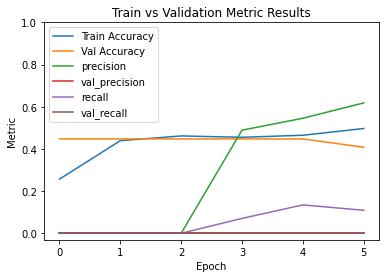

In [306]:
plt.plot(history15.history['accuracy'], label='Train Accuracy')
plt.plot(history15.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history15.history['precision'], label = 'precision')
plt.plot(history15.history['val_precision'], label = 'val_precision')
plt.plot(history15.history['recall'], label = 'recall')
plt.plot(history15.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

slow learning rate 

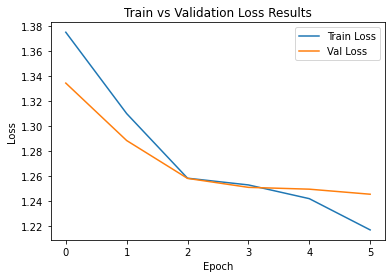

In [307]:
plt.plot(history15.history['loss'], label = 'Train Loss')
plt.plot(history15.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [308]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [388]:
model15.evaluate(test_data_aug)

preds15 = model15.predict(test_data_aug)
preds15 = np.argmax(preds15, axis = 1)

test_data_values = test_data_aug.labels 

cm = confusion_matrix(test_data_values, preds15)

3/3 [==============================] - 2s 430ms/step - loss: 1.6303 - accuracy: 0.4868 - recall: 0.3947 - precision: 0.5556


#### Adding Results to DF

In [135]:
results_df2['test_accuracy'].iloc[15] = 0.4868

results_df2['test_recall'].iloc[15] =  0.3947

results_df2['test_precision'].iloc[15] = 0.5556


#### Confusion Matrix

In [389]:
print(pd.DataFrame(cm, index = ['effusion', 'normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       3             1     3
normal               0      24             0    10
otitis_media         0       4             7     5
tube                 0      10             1     8


good at predicting normal picutres correctly 

#### Classification Report 

In [390]:
print(classification_report(test_data_values, preds15, target_names = [ 'effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.59      0.71      0.64        34
otitis_media       0.78      0.44      0.56        16
        tube       0.31      0.42      0.36        19

    accuracy                           0.51        76
   macro avg       0.42      0.39      0.39        76
weighted avg       0.50      0.51      0.49        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


other models with higher performing f1 and recall score for otitis media

## Model 16: Maxpool,Conv2D, with Less Neurons

In [463]:
model16 = Sequential()
model16.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model16.add(MaxPool2D((2, 2)))
model16.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model16.add(Flatten())
model16.add(Dense(100, activation = 'relu'))
model16.add(Dropout(0.2))
model16.add(Dense(4, activation = 'softmax'))

model16.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [464]:
history16 = model16.fit(train_aug, epochs = 60, validation_data = test_data_aug,
    batch_size = 32)

Epoch 1/60
10/10 [==============================] - 13s 1s/step - loss: 21.9901 - accuracy: 0.3429 - recall: 0.3333 - precision: 0.3714 - val_loss: 5.3897 - val_accuracy: 0.2500 - val_recall: 0.2500 - val_precision: 0.2603
Epoch 2/60
10/10 [==============================] - 12s 1s/step - loss: 5.6592 - accuracy: 0.3622 - recall: 0.3558 - precision: 0.3712 - val_loss: 2.1274 - val_accuracy: 0.2895 - val_recall: 0.2632 - val_precision: 0.3030
Epoch 3/60
10/10 [==============================] - 13s 1s/step - loss: 1.7128 - accuracy: 0.4295 - recall: 0.3558 - precision: 0.4549 - val_loss: 1.2418 - val_accuracy: 0.4474 - val_recall: 0.2368 - val_precision: 0.4615
Epoch 4/60
10/10 [==============================] - 13s 1s/step - loss: 1.1704 - accuracy: 0.4872 - recall: 0.2917 - precision: 0.5688 - val_loss: 1.2085 - val_accuracy: 0.4342 - val_recall: 0.2237 - val_precision: 0.7727
Epoch 5/60
10/10 [==============================] - 12s 1s/step - loss: 1.1034 - accuracy: 0.6122 - recall: 0.2

In [471]:
results_df2['train_accuracy'].iloc[16] = 0.9038

results_df2['train_recall'].iloc[16] = 0.8846 

results_df2['train_precision'].iloc[16] =0.9356

results_df2['val_accuracy'].iloc[16] = 0.7237  

results_df2['val_recall'].iloc[16] = 0.6842

results_df2['val_precision'].iloc[16] =  0.7647

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


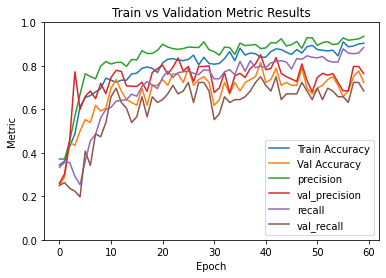

In [465]:
plt.plot(history16.history['accuracy'], label='Train Accuracy')
plt.plot(history16.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history16.history['precision'], label = 'precision')
plt.plot(history16.history['val_precision'], label = 'val_precision')
plt.plot(history16.history['recall'], label = 'recall')
plt.plot(history16.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

not as overfit as some models, improving validation metrics 

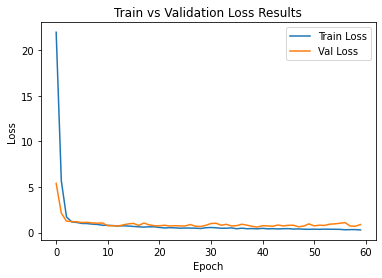

In [466]:
plt.plot(history16.history['loss'], label = 'Train Loss')
plt.plot(history16.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

In [467]:
results = model16.evaluate(test_data_aug)

preds16 = model16.predict(test_data_aug)
preds16 = np.argmax(preds16, axis=1)

test_data_values = test_data_aug.labels 


3/3 [==============================] - 2s 531ms/step - loss: 0.7338 - accuracy: 0.7368 - recall: 0.7105 - precision: 0.7500


In [468]:

results_df2['test_accuracy'].iloc[16] =0.7368

results_df2['test_recall'].iloc[16] = 0.7105 

results_df2['test_precision'].iloc[16] = 0.7500

In [469]:
cm = confusion_matrix(test_data_values, preds16)
print(pd.DataFrame(cm, index = ['effusion','normal', 'otitis_media', 'tube'], columns = [ 'effusion' ,'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       5             1     1
normal               1      25             8     0
otitis_media         1       0            12     3
tube                 0       2             1    16


Model able to predct otitis media and tube pictures well, Not able to predict effusion pictures as well

In [470]:
print(classification_report(test_data_values, preds16, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.78      0.74      0.76        34
otitis_media       0.55      0.75      0.63        16
        tube       0.80      0.84      0.82        19

    accuracy                           0.70        76
   macro avg       0.53      0.58      0.55        76
weighted avg       0.66      0.70      0.68        76



recall for otitis media at 0.75 and f1 score for otitis media at 0.63. Model 12 still outperforms regarding f1 score and recall score for otitis media metrics 

## Model 17: Freezing Inception-ResNetV2

In [ ]:
#reference https://www.youtube.com/watch?v=3ou0KYtDlOI
#Deep Learning with Python by Fracois Chollet

In [138]:
conv_base17 = InceptionResNetV2(include_top=False, input_shape = (299, 299, 3))

conv_base17.trainable = False

set_trainable = False 

for layer in conv_base17.layers[:90]:
    layer.trainable = False
for layer in conv_base17.layers[90:]:
    layer.trainable = True

conv_base17.summary()

model17= Sequential()
model17.add(conv_base17)
model17.add(GlobalAveragePooling2D())
model17.add(Flatten())
model17.add(Dense(4, activation = 'softmax'))



Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
________________________________________________________________________________

In [141]:
model17.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])


history = model17.fit(train_aug, epochs = 7, validation_data = test_data_aug, batch_size = 32, callbacks=[early_stop])



Epoch 1/7
10/10 [==============================] - 41s 3s/step - loss: 1.2556 - accuracy: 0.4744 - recall: 0.2179 - precision: 0.5484 - val_loss: 1.3061 - val_accuracy: 0.4079 - val_recall: 0.3553 - val_precision: 0.5192
Epoch 2/7
10/10 [==============================] - 32s 3s/step - loss: 1.1197 - accuracy: 0.5994 - recall: 0.1699 - precision: 0.8413 - val_loss: 1.3466 - val_accuracy: 0.4737 - val_recall: 0.3947 - val_precision: 0.4688
Epoch 3/7
10/10 [==============================] - 30s 3s/step - loss: 1.0561 - accuracy: 0.5192 - recall: 0.4199 - precision: 0.6422 - val_loss: 1.1384 - val_accuracy: 0.4737 - val_recall: 0.3816 - val_precision: 0.5370
Epoch 4/7
10/10 [==============================] - 30s 3s/step - loss: 0.9959 - accuracy: 0.6795 - recall: 0.2596 - precision: 0.9101 - val_loss: 1.1216 - val_accuracy: 0.4211 - val_recall: 0.3947 - val_precision: 0.5000
Epoch 5/7
10/10 [==============================] - 30s 3s/step - loss: 0.9436 - accuracy: 0.6635 - recall: 0.4712 - 

In [142]:
results_df2['train_accuracy'].iloc[17] = 0.7340

results_df2['train_recall'].iloc[17] = 0.4199

results_df2['train_precision'].iloc[17] = 0.8912 

results_df2['val_accuracy'].iloc[17] = 0.6053 

results_df2['val_recall'].iloc[17] = 0.5000 

results_df2['val_precision'].iloc[17] =  0.6230

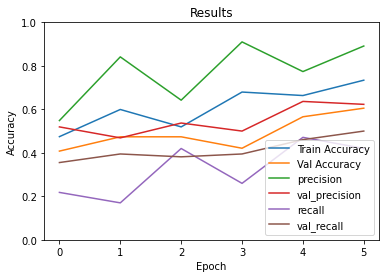

In [143]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

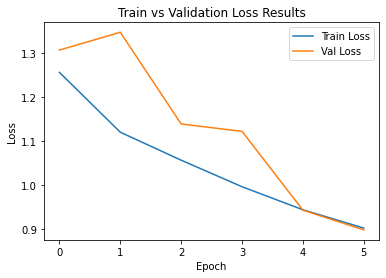

In [144]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

In [145]:
model17.evaluate(test_data_aug)

preds17 = model17.predict(test_data_aug)
preds17 = np.argmax(preds17, axis=1)

test_data_values = test_data_aug.labels 

3/3 [==============================] - 5s 1s/step - loss: 0.9077 - accuracy: 0.6053 - recall: 0.5132 - precision: 0.6500


In [146]:
results_df2['test_accuracy'].iloc[17] = 0.6053

results_df2['test_recall'].iloc[17] = 0.5132

results_df2['test_precision'].iloc[17] =  0.6500

In [148]:
cm = confusion_matrix(test_data_values, preds17)
print(pd.DataFrame(cm, index = ['effusion','normal', 'otitis_media', 'tube'], columns = ['effusion', 'normal', 'otitis_media', 'tube']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

              effusion  normal  otitis_media  tube
effusion             0       7             0     0
normal               0      28             0     6
otitis_media         0      11             4     1
tube                 0       7             0    12


does not do as well at predicting otitis media as other models 

In [149]:
print(classification_report(test_data_values, preds17, target_names = ['effusion', 'normal', 'otitis_media', 'tube']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.00      0.00      0.00         7
      normal       0.53      0.82      0.64        34
otitis_media       1.00      0.25      0.40        16
        tube       0.63      0.63      0.63        19

    accuracy                           0.58        76
   macro avg       0.54      0.43      0.42        76
weighted avg       0.60      0.58      0.53        76



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


does not do as well at predicting otitis media as other models 

### Exports

In [ ]:
results_df2 = results_df2[:18]

In [6]:
results_df2.to_csv('../data/results_df2.csv')

In [ ]:
model12.save('../streamlit_and_models/model12.h5')